In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc= {'figure.figsize':(11,11)})

family = 'Malgun Gothic'
plt.rc('font' ,family=family)

In [3]:
CITY = "부산광역시"

In [4]:
apart_df = pd.read_csv(f'data/{CITY}/apartment_df_by_dong.csv')
day_care_center_df = pd.read_csv(f'data/{CITY}/day_care_center_df.csv', index_col=0)

In [5]:
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dong                    147 non-null    object 
 1   exclusive_use_area      147 non-null    float64
 2   transaction_real_price  147 non-null    float64
 3   real_price_per_m2       147 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.7+ KB


In [6]:
day_care_center_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 1567 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  1895 non-null   object 
 1   gu                    1895 non-null   object 
 2   day_care_name         1895 non-null   object 
 3   day_care_type         1895 non-null   object 
 4   day_care_baby_num     1895 non-null   int64  
 5   teacher_num           1895 non-null   float64
 6   nursing_room_num      1395 non-null   float64
 7   playground_num        1133 non-null   float64
 8   CCTV_num              1435 non-null   float64
 9   is_commuting_vehicle  1894 non-null   object 
 10  reference_date        1895 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 177.7+ KB


In [7]:
park_df = pd.read_csv(f'data/{CITY}/park_df.csv')
park_df

,Unnamed: 0,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,1307,부산광역시,사상구,괘법동,사상공원,근린공원,622916.0,NaN,모험시설 등 22종 23점,NaN,NaN,파고라 외 9종 84점,1972.0,2019-03-21
425,1308,부산광역시,사상구,엄궁동,해름소공원,소공원,835.0,NaN,NaN,NaN,NaN,파고라 외 4종 14점,2008.0,2019-03-21
426,1309,부산광역시,사상구,모라동,모라벤처타워공원,소공원,735.8,NaN,NaN,NaN,NaN,평의자 외 2종 12점,2012.0,2019-03-21
427,1310,부산광역시,사상구,주례동,주감공원,소공원,1250.0,NaN,NaN,NaN,NaN,파고라 외 4종 7점,2013.0,2019-03-21


In [8]:
gu_dong_unique = park_df[['gu', 'dong']].drop_duplicates().reset_index(drop=True)
gu_dong_unique

,gu,dong
0,남구,대연동
1,남구,용호동
2,남구,문현동
3,남구,우암동
4,남구,감만동
...,...,...
76,사상구,덕포동
77,사상구,괘법동
78,사상구,주례동
79,사상구,학장동


In [9]:
apart_df = pd.merge(gu_dong_unique, apart_df)

In [10]:
mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()
mean_data_for_gu

C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\3301734812.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()


,gu,exclusive_use_area,transaction_real_price,real_price_per_m2
0,강서구,79.939677,22217.519891,286.690055
1,금정구,78.695467,18969.185553,239.742736
2,남구,80.365749,19560.359637,238.993056
3,동구,80.346079,21463.521160,251.674137
4,동래구,79.895408,22161.972234,274.067633
5,부산진구,74.067168,19584.664228,268.224009
6,북구,69.450523,16133.719570,229.038657
7,사상구,69.797635,15376.317128,221.240413
8,사하구,77.132266,15155.646941,197.170316
9,서구,77.213802,18388.042761,242.599011


In [11]:
corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()
corr_df

C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\957790929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()


,exclusive_use_area,transaction_real_price,real_price_per_m2,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
exclusive_use_area,1.000000,0.832462,0.673195,0.017779,0.034207,0.088064,-0.127633,0.133885
transaction_real_price,0.832462,1.000000,0.953122,0.000591,0.001777,0.038926,-0.173650,0.110469
real_price_per_m2,0.673195,0.953122,1.000000,-0.013405,-0.019018,-0.008797,-0.160414,0.074866
day_care_baby_num,0.017779,0.000591,-0.013405,1.000000,0.828481,0.750492,0.397657,0.695890
teacher_num,0.034207,0.001777,-0.019018,0.828481,1.000000,0.716610,0.346760,0.663363
nursing_room_num,0.088064,0.038926,-0.008797,0.750492,0.716610,1.000000,0.307949,0.737525
playground_num,-0.127633,-0.173650,-0.160414,0.397657,0.346760,0.307949,1.000000,0.297392
CCTV_num,0.133885,0.110469,0.074866,0.695890,0.663363,0.737525,0.297392,1.000000


C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


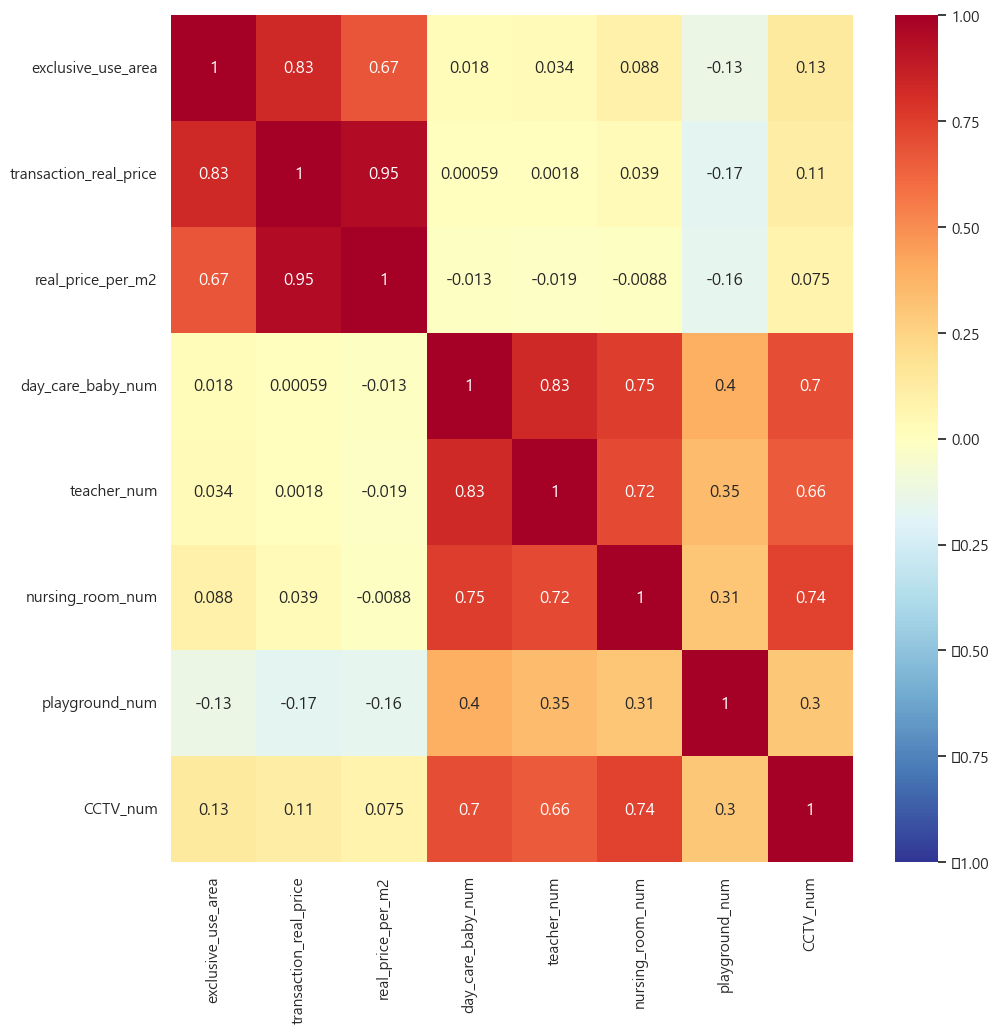

In [12]:
sns.heatmap(data=corr_df, annot=True, cmap="RdYlBu_r", vmin=-1, vmax=1)
plt.show()

In [13]:
apart_df = pd.read_csv(f'data/{CITY}/apartment_df.csv')
apart_df[['dong', 'exclusive_use_area', 'transaction_real_price']]

,dong,exclusive_use_area,transaction_real_price
0,영주동,57.0900,7900
1,영주동,84.9700,13000
2,영주동,84.8600,12400
3,영주동,84.7200,10600
4,영주동,84.5900,10000
...,...,...,...
474263,정관읍 용수리,59.8245,22000
474264,정관읍 용수리,84.9923,30750
474265,정관읍 용수리,84.9923,29500
474266,정관읍 용수리,101.7400,26700


In [14]:
apart_df = apart_df[['dong', 'exclusive_use_area', 'transaction_real_price']]
apart_df['real_price_per_m2'] = apart_df['transaction_real_price'] / apart_df['exclusive_use_area']
apart_df

,dong,exclusive_use_area,transaction_real_price,real_price_per_m2
0,영주동,57.0900,7900,138.378000
1,영주동,84.9700,13000,152.995175
2,영주동,84.8600,12400,146.123026
3,영주동,84.7200,10600,125.118036
4,영주동,84.5900,10000,118.217283
...,...,...,...,...
474263,정관읍 용수리,59.8245,22000,367.742313
474264,정관읍 용수리,84.9923,30750,361.797480
474265,정관읍 용수리,84.9923,29500,347.090266
474266,정관읍 용수리,101.7400,26700,262.433654


In [15]:
apart_df = pd.merge(apart_df, gu_dong_unique)
mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()
mean_data_for_gu

C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\237663696.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()


,gu,exclusive_use_area,transaction_real_price,real_price_per_m2
0,강서구,104.318319,30303.476358,292.218202
1,금정구,83.555822,22736.463471,269.614303
2,남구,85.962147,23469.688425,265.086395
3,동구,84.489880,23207.848901,261.082904
4,동래구,81.596459,23279.718287,282.192079
5,부산진구,71.914685,18560.346985,258.985148
6,북구,72.020467,17981.371051,245.187390
7,사상구,70.002937,14916.602438,213.445296
8,사하구,76.073342,15633.193056,204.864325
9,서구,82.578112,19403.873382,234.312084


In [16]:
corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()
corr_df

C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\957790929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()


,exclusive_use_area,transaction_real_price,real_price_per_m2,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
exclusive_use_area,1.000000,0.858718,0.618750,-0.006715,-0.006153,0.015381,-0.203063,0.062237
transaction_real_price,0.858718,1.000000,0.926269,-0.010261,-0.013243,0.019848,-0.245577,0.078656
real_price_per_m2,0.618750,0.926269,1.000000,-0.012766,-0.014961,0.019917,-0.244291,0.088041
day_care_baby_num,-0.006715,-0.010261,-0.012766,1.000000,0.828481,0.750492,0.397657,0.695890
teacher_num,-0.006153,-0.013243,-0.014961,0.828481,1.000000,0.716610,0.346760,0.663363
nursing_room_num,0.015381,0.019848,0.019917,0.750492,0.716610,1.000000,0.307949,0.737525
playground_num,-0.203063,-0.245577,-0.244291,0.397657,0.346760,0.307949,1.000000,0.297392
CCTV_num,0.062237,0.078656,0.088041,0.695890,0.663363,0.737525,0.297392,1.000000


C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


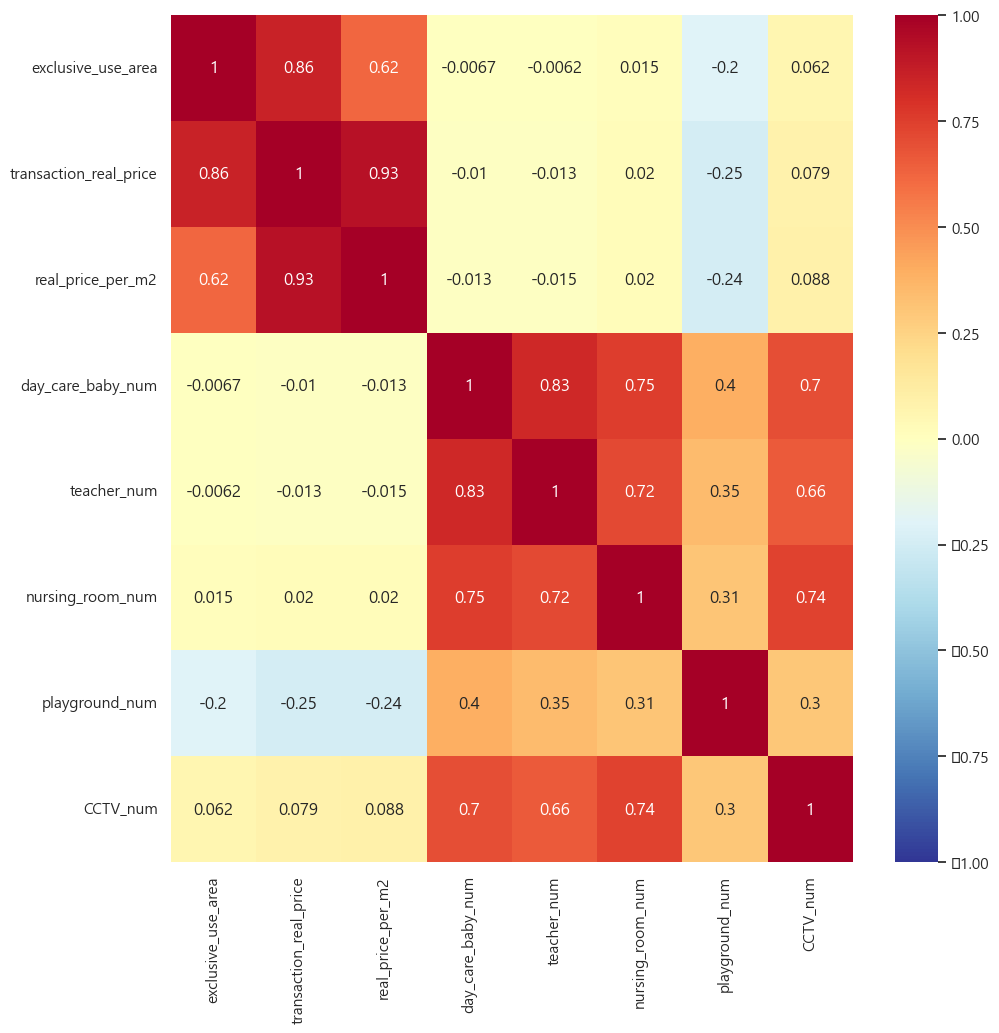

In [17]:
sns.heatmap(data=corr_df, annot=True, cmap="RdYlBu_r", vmin=-1, vmax=1)
plt.show()

In [18]:
day_care_center_df_groupby = day_care_center_df.groupby('gu').sum().reset_index()
day_care_center_df_groupby

C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\2738215850.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_care_center_df_groupby = day_care_center_df.groupby('gu').sum().reset_index()


,gu,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,강서구,5312,982.0,534.0,18.0,790.0
1,금정구,5251,1059.0,0.0,0.0,0.0
2,기장군,7689,1528.0,841.0,85.0,998.0
3,남구,6676,1203.0,661.0,0.0,909.0
4,동구,2214,388.0,0.0,0.0,295.0
5,동래구,6293,1130.0,643.0,33.0,928.0
6,부산진구,7245,1375.0,683.0,55.0,1107.0
7,북구,8094,1540.0,899.0,25.0,1147.0
8,사상구,5371,960.0,499.0,143.0,523.0
9,사하구,9987,1884.0,986.0,119.0,1350.0


In [19]:
def draw_heatmap_for_corr(corr_df):
    sns.heatmap(data=corr_df, annot=True, cmap="RdYlBu_r", vmin=-1, vmax=1)
    plt.show()

C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\4160059563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby).corr())
C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


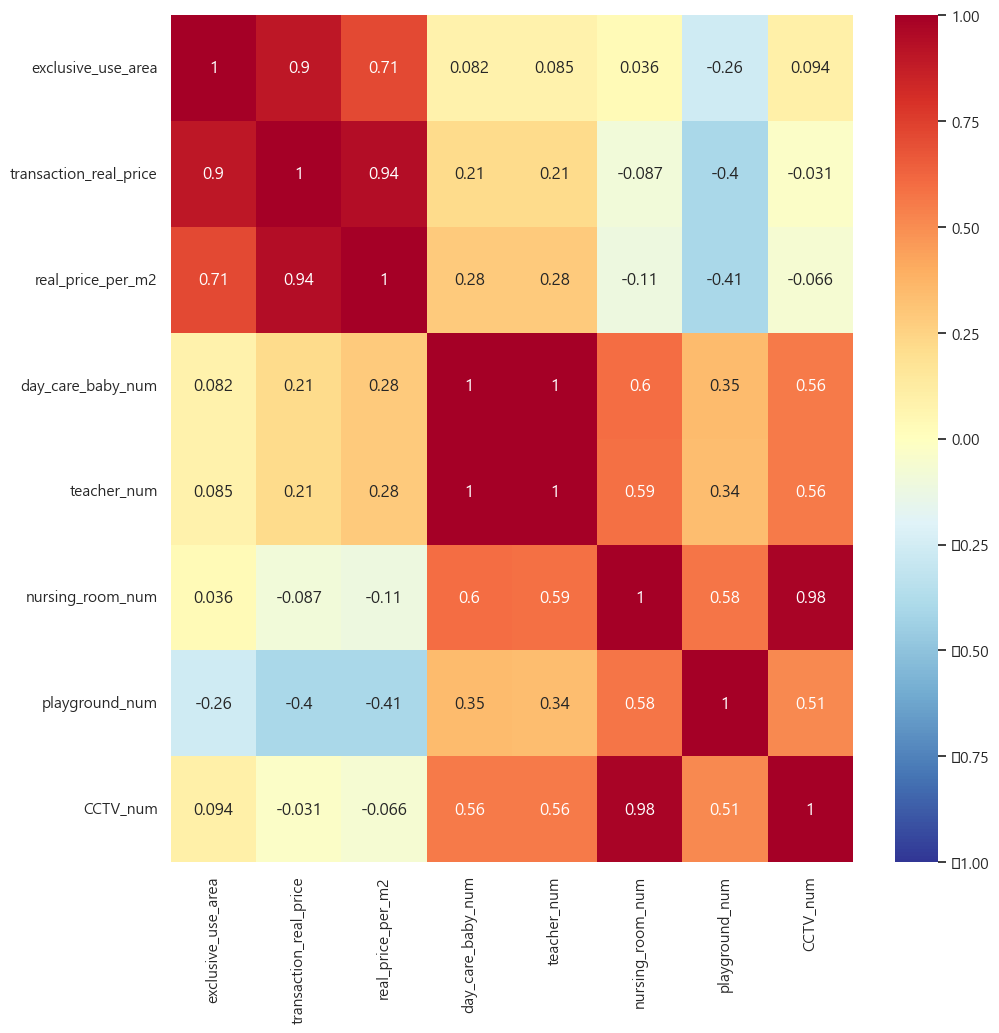

In [20]:
draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby).corr())

C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\995701265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby.replace(0, np.nan)).corr())
C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


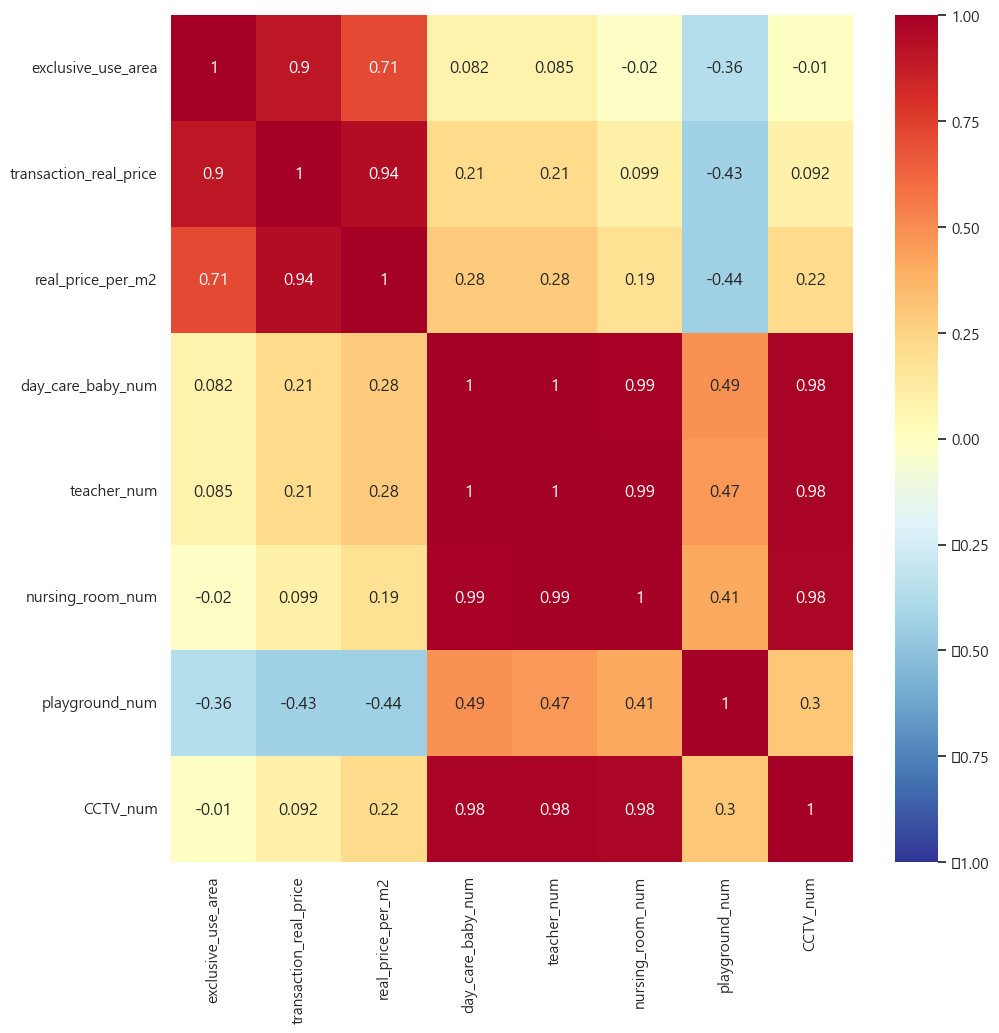

In [21]:
draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby.replace(0, np.nan)).corr())

In [22]:
day_care_center_df_groupby.replace(0, np.nan)

,gu,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,강서구,5312,982.0,534.0,18.0,790.0
1,금정구,5251,1059.0,NaN,NaN,NaN
2,기장군,7689,1528.0,841.0,85.0,998.0
3,남구,6676,1203.0,661.0,NaN,909.0
4,동구,2214,388.0,NaN,NaN,295.0
5,동래구,6293,1130.0,643.0,33.0,928.0
6,부산진구,7245,1375.0,683.0,55.0,1107.0
7,북구,8094,1540.0,899.0,25.0,1147.0
8,사상구,5371,960.0,499.0,143.0,523.0
9,사하구,9987,1884.0,986.0,119.0,1350.0


In [23]:
from sklearn.impute import KNNImputer

model = KNNImputer(n_neighbors=10)
model

KNNImputer(n_neighbors=10)

In [24]:
numeric_columns = [column for column in day_care_center_df.columns if "num" in column]

In [25]:
numeric_df = day_care_center_df[numeric_columns]
numeric_df.reset_index(drop=True, inplace=True)
numeric_df

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,19,6.0,NaN,NaN,NaN
1,20,6.0,NaN,NaN,NaN
2,17,5.0,NaN,NaN,NaN
3,14,4.0,NaN,NaN,NaN
4,18,5.0,NaN,NaN,NaN
...,...,...,...,...,...
1890,46,13.0,NaN,NaN,NaN
1891,19,6.0,NaN,NaN,NaN
1892,92,16.0,NaN,NaN,NaN
1893,43,12.0,NaN,NaN,NaN


In [26]:
day_care_center_filled_data = model.fit_transform(numeric_df)
day_care_center_filled_df = pd.DataFrame(day_care_center_filled_data, columns=numeric_columns )
day_care_center_filled_df

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,19.0,6.0,3.2,0.0,3.8
1,20.0,6.0,3.6,0.0,4.4
2,17.0,5.0,3.3,0.0,3.9
3,14.0,4.0,3.3,0.0,3.6
4,18.0,5.0,4.3,0.3,4.0
...,...,...,...,...,...
1890,46.0,13.0,5.0,0.1,6.5
1891,19.0,6.0,3.2,0.0,3.8
1892,92.0,16.0,7.7,1.1,12.5
1893,43.0,12.0,4.7,0.1,5.8


In [27]:
day_care_center_df.reset_index(drop=True, inplace=True)
day_care_center_df

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,부산광역시,영도구,까꿍영재어린이집,가정,19,6.0,NaN,NaN,NaN,Y,2018-08-10
1,부산광역시,영도구,대원숲속어린이집,가정,20,6.0,NaN,NaN,NaN,Y,2018-08-10
2,부산광역시,영도구,롯데낙천대애플어린이집,가정,17,5.0,NaN,NaN,NaN,Y,2018-08-10
3,부산광역시,영도구,미주어린이집,가정,14,4.0,NaN,NaN,NaN,Y,2018-08-10
4,부산광역시,영도구,보혜영재어린이집,가정,18,5.0,NaN,NaN,NaN,Y,2018-08-10
...,...,...,...,...,...,...,...,...,...,...,...
1890,부산광역시,금정구,해바라기어린이집,민간,46,13.0,NaN,NaN,NaN,y,2019-01-21
1891,부산광역시,금정구,해수어린이집,가정,19,6.0,NaN,NaN,NaN,y,2019-01-21
1892,부산광역시,금정구,행복한그림동산어린이집,민간,92,16.0,NaN,NaN,NaN,y,2019-01-21
1893,부산광역시,금정구,행복한어린이집,민간,43,12.0,NaN,NaN,NaN,y,2019-01-21


In [28]:
day_care_center_df[numeric_columns] = day_care_center_filled_df
day_care_center_df

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,부산광역시,영도구,까꿍영재어린이집,가정,19.0,6.0,3.2,0.0,3.8,Y,2018-08-10
1,부산광역시,영도구,대원숲속어린이집,가정,20.0,6.0,3.6,0.0,4.4,Y,2018-08-10
2,부산광역시,영도구,롯데낙천대애플어린이집,가정,17.0,5.0,3.3,0.0,3.9,Y,2018-08-10
3,부산광역시,영도구,미주어린이집,가정,14.0,4.0,3.3,0.0,3.6,Y,2018-08-10
4,부산광역시,영도구,보혜영재어린이집,가정,18.0,5.0,4.3,0.3,4.0,Y,2018-08-10
...,...,...,...,...,...,...,...,...,...,...,...
1890,부산광역시,금정구,해바라기어린이집,민간,46.0,13.0,5.0,0.1,6.5,y,2019-01-21
1891,부산광역시,금정구,해수어린이집,가정,19.0,6.0,3.2,0.0,3.8,y,2019-01-21
1892,부산광역시,금정구,행복한그림동산어린이집,민간,92.0,16.0,7.7,1.1,12.5,y,2019-01-21
1893,부산광역시,금정구,행복한어린이집,민간,43.0,12.0,4.7,0.1,5.8,y,2019-01-21


C:\Users\rluvu\AppData\Local\Temp\ipykernel_9556\4234036479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df).corr())
C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


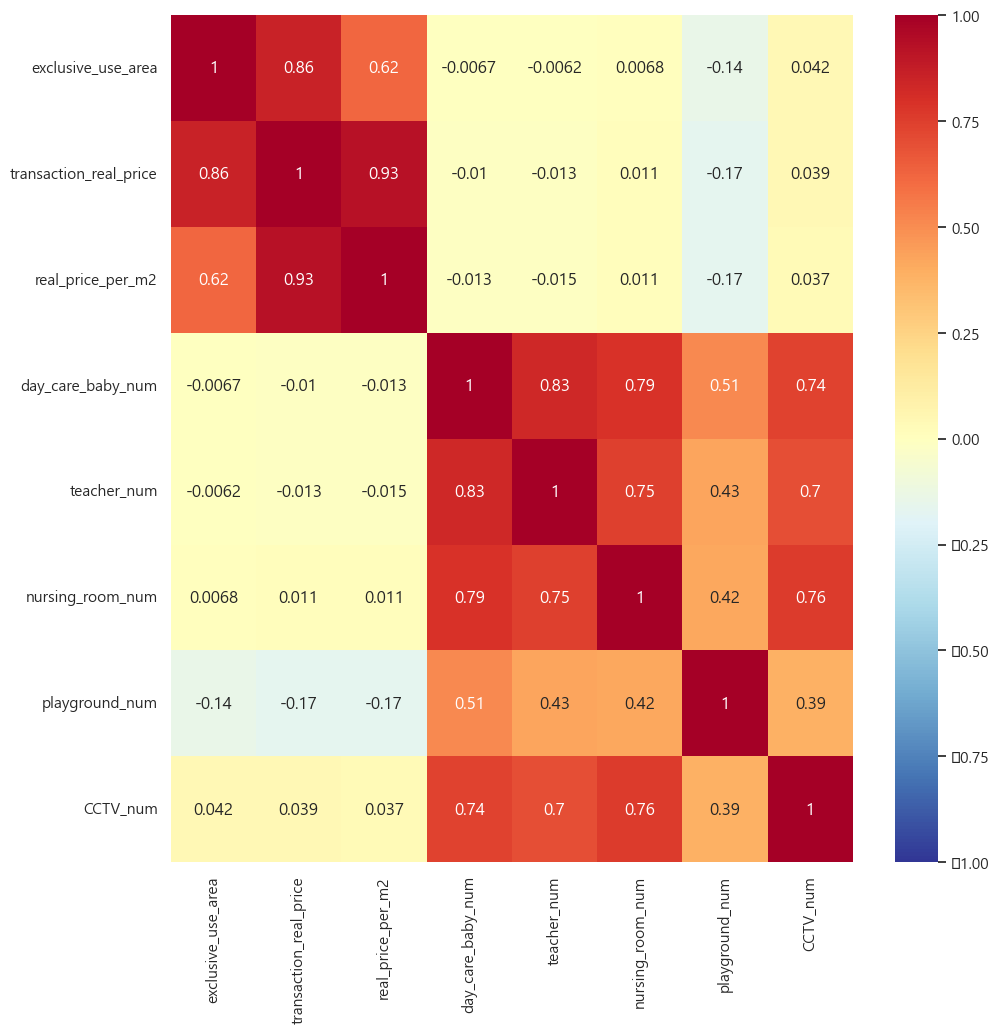

In [29]:
draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df).corr())